In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

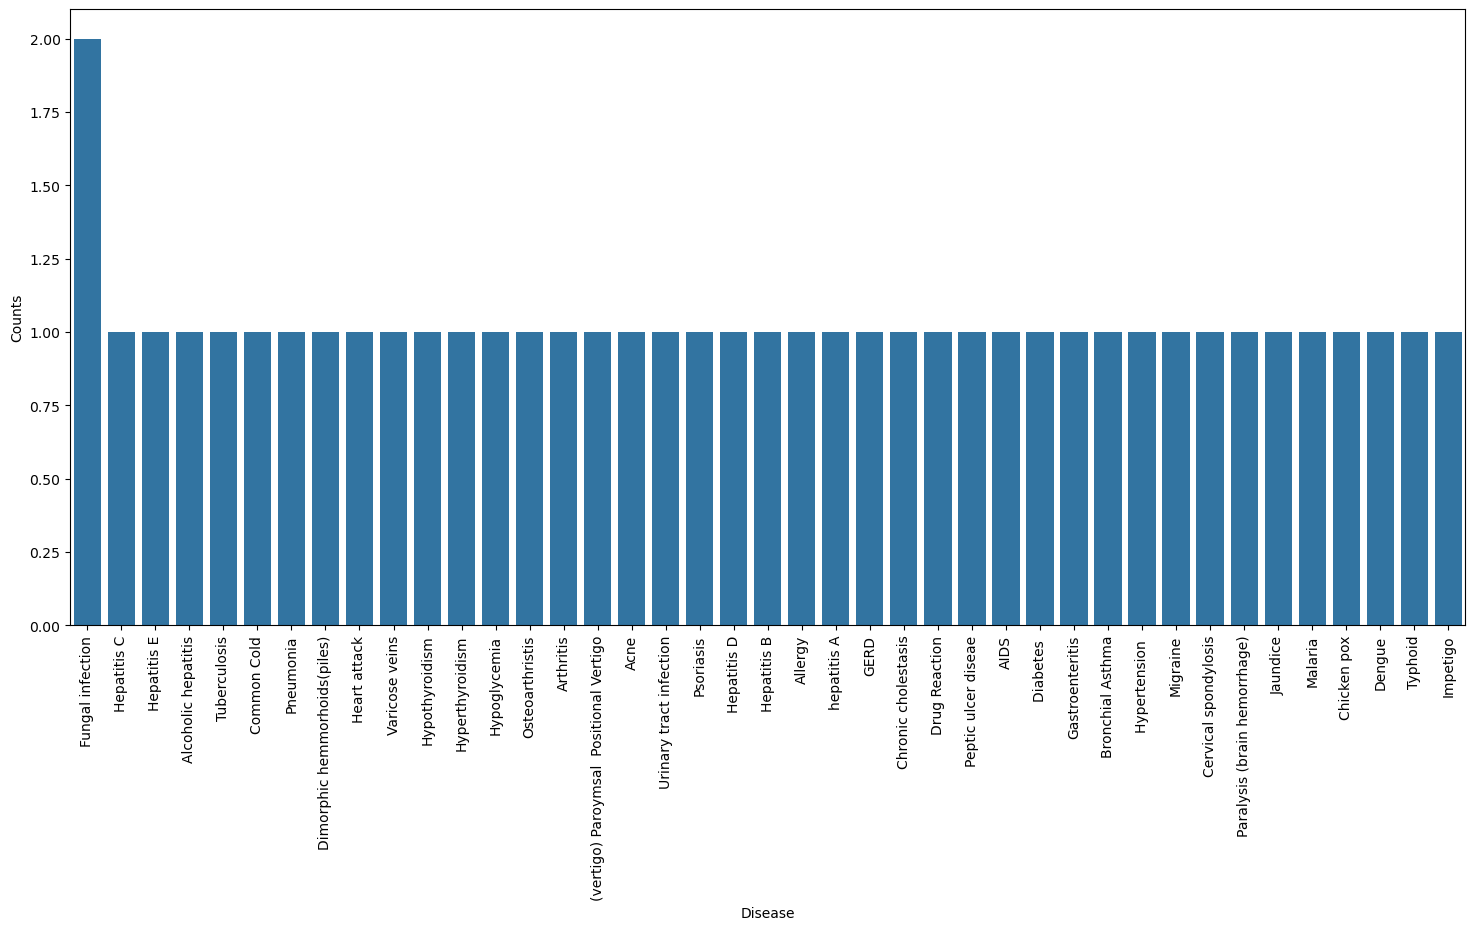

In [5]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = r"C:\Users\subhash\Downloads\Dataset---Disease-Prediction-Using--Machine-Learning.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [7]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (33, 132), (33,)
Test: (9, 132), (9,)


In [15]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter

# Sample dataset (Replace X and y with your actual dataset)
X = np.random.rand(20, 5)  # 20 samples, 5 features
y = np.random.randint(0, 2, 20)  # Binary classification (0 and 1)

# Check class distribution
class_counts = Counter(y)
min_class_size = min(class_counts.values())

# Ensure n_splits is not greater than the smallest class count
n_splits = min(3, min_class_size)  # At most 3 splits, ensuring it's valid

# Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Cross-validation scoring metric
cv_scoring = 'accuracy'

# Evaluate models
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, n_jobs=-1, scoring=cv_scoring)
    
    print("=" * 60)
    print(f"Model: {model_name}")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")


Model: Random Forest
Accuracy Scores: [0.42857143 0.57142857 0.66666667]
Mean Accuracy: 0.5556
Model: SVM
Accuracy Scores: [0.71428571 0.57142857 0.66666667]
Mean Accuracy: 0.6508
Model: KNN
Accuracy Scores: [0.71428571 0.57142857 0.66666667]
Mean Accuracy: 0.6508
Model: Decision Tree
Accuracy Scores: [0.71428571 0.42857143 0.5       ]
Mean Accuracy: 0.5476
Model: Logistic Regression
Accuracy Scores: [0.71428571 0.57142857 0.66666667]
Mean Accuracy: 0.6508


Training set class distribution: Counter({0: 10, 1: 6})
Testing set class distribution: Counter({0: 3, 1: 1})

🔹 Accuracy on Train Data (SVM Classifier): 87.50%
🔹 Accuracy on Test Data (SVM Classifier): 75.00%


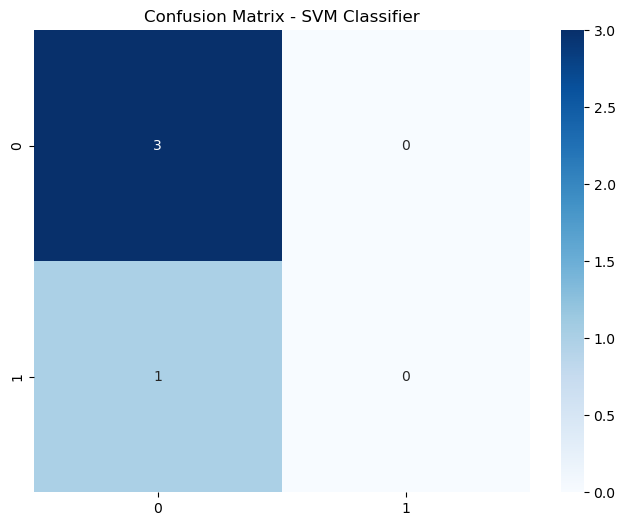


🔹 Accuracy on Train Data (Naive Bayes Classifier): 81.25%
🔹 Accuracy on Test Data (Naive Bayes Classifier): 50.00%


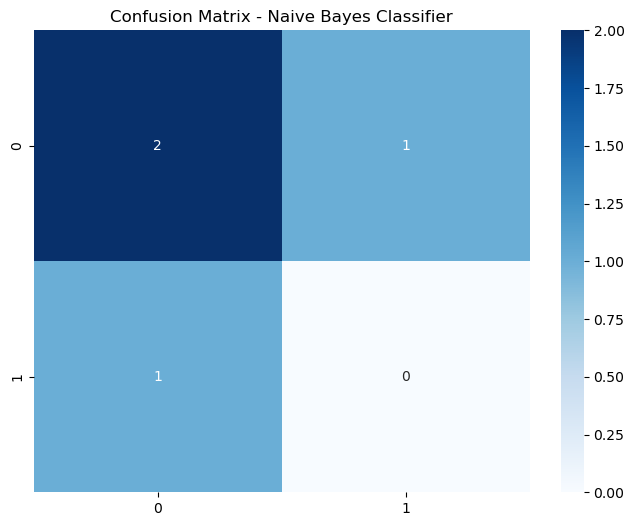


🔹 Accuracy on Train Data (Random Forest Classifier): 100.00%
🔹 Accuracy on Test Data (Random Forest Classifier): 75.00%


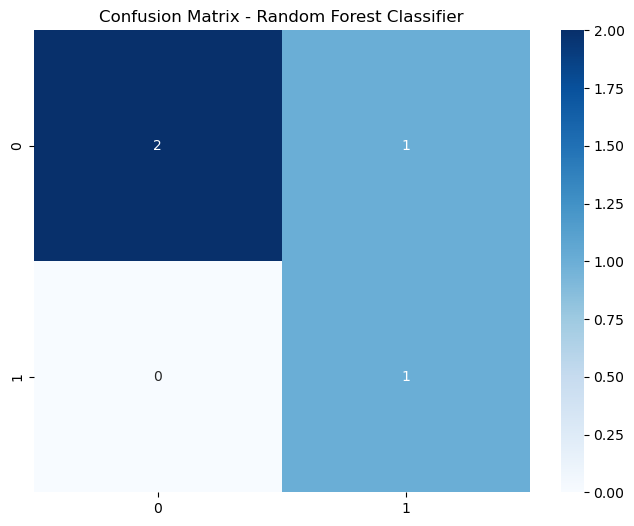


🔹 Cross-validation accuracy (SVM): 65.0
🔹 Cross-validation accuracy (Random Forest): 45.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set class distribution:", Counter(y_train))
print("Testing set class distribution:", Counter(y_test))


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def train_and_evaluate(model, model_name):
    """Train the model and print accuracy & confusion matrix."""
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, preds) * 100

    print(f"\n🔹 Accuracy on Train Data ({model_name}): {train_acc:.2f}%")
    print(f"🔹 Accuracy on Test Data ({model_name}): {test_acc:.2f}%")

    # Plot Confusion Matrix
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return train_acc, test_acc

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
train_and_evaluate(svm_model, "SVM Classifier")

nb_model = GaussianNB()
train_and_evaluate(nb_model, "Naive Bayes Classifier")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
train_and_evaluate(rf_model, "Random Forest Classifier")


svm_cv_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X, y, cv=5)
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=5), X, y, cv=5)

print("\n🔹 Cross-validation accuracy (SVM):", np.mean(svm_cv_scores) * 100)
print("🔹 Cross-validation accuracy (Random Forest):", np.mean(rf_cv_scores) * 100)


Accuracy on Test dataset by the combined model: 100.00%


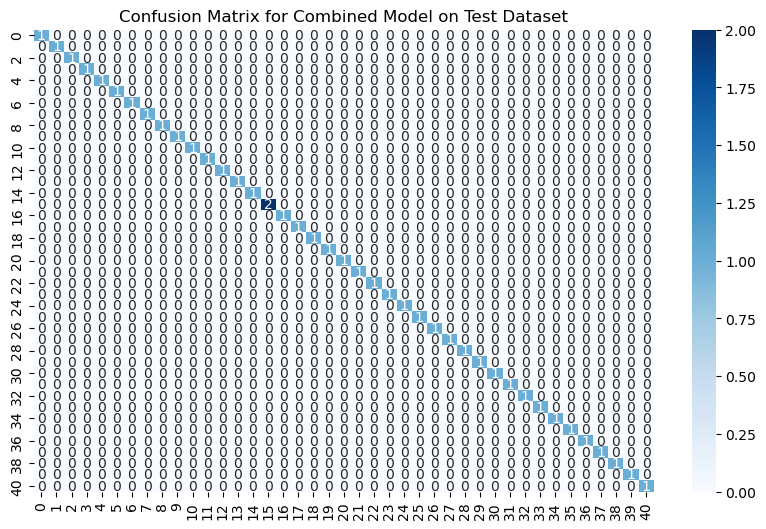

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# 🟢 Load training data (Ensure X is a DataFrame)
df = pd.read_csv(r"C:\Users\subhash\Downloads\Dataset---Disease-Prediction-Using--Machine-Learning.csv")  # Replace with actual training data file
X = df.iloc[:, :-1]  # Features (Ensure DataFrame)
y = LabelEncoder().fit_transform(df.iloc[:, -1])  # Target variable

# 🟢 Train models on whole dataset
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

# Fit models on X (training data)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# 🟢 Load and preprocess test data
test_data = pd.read_csv(r"C:\Users\subhash\Downloads\Dataset---Disease-Prediction-Using--Machine-Learning.csv").dropna(axis=1)

# Convert to DataFrame if necessary
test_X = pd.DataFrame(test_data.iloc[:, :-1])  # Ensure test_X is a DataFrame
test_Y = LabelEncoder().fit_transform(test_data.iloc[:, -1])  # Encode labels

# 🟢 Fix Feature Mismatch & Order
# Ensure test_X has the same features and order as training X
test_X = test_X[X.columns]  # Reorder columns to match training data

# 🟢 Predict using all classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# 🟢 Fix Mode Calculation (Scipy Deprecation Warning)
final_preds = stats.mode(np.column_stack((svm_preds, nb_preds, rf_preds)), axis=1, keepdims=True).mode.flatten()

# 🟢 Evaluate Performance
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

# 🟢 Confusion Matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [55]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
print(predictDisease("High Fever,Cough,Skin Rash"))  # Use exact symptom names


{'rf_model_prediction': 'Impetigo', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\subhash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
